# Vehicle Insurance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# EDA

In [7]:
train.shape

(381109, 12)

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']

In [10]:
train["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [11]:
train["Driving_License"].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [12]:
train["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [13]:
train["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [14]:
train["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Inspecting Target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


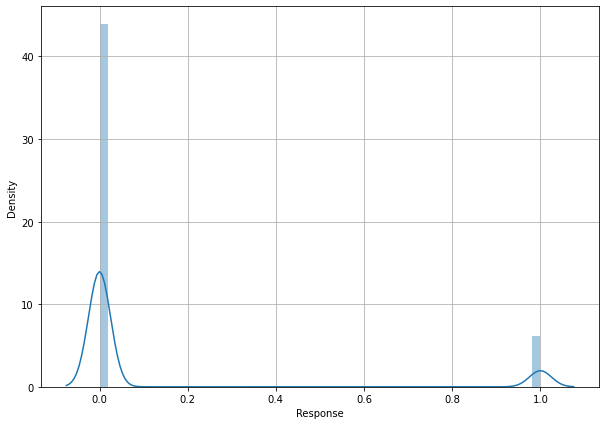

In [15]:
plt.figure(figsize = [10,7])

sns.distplot(train['Response'])
plt.grid()
plt.show()

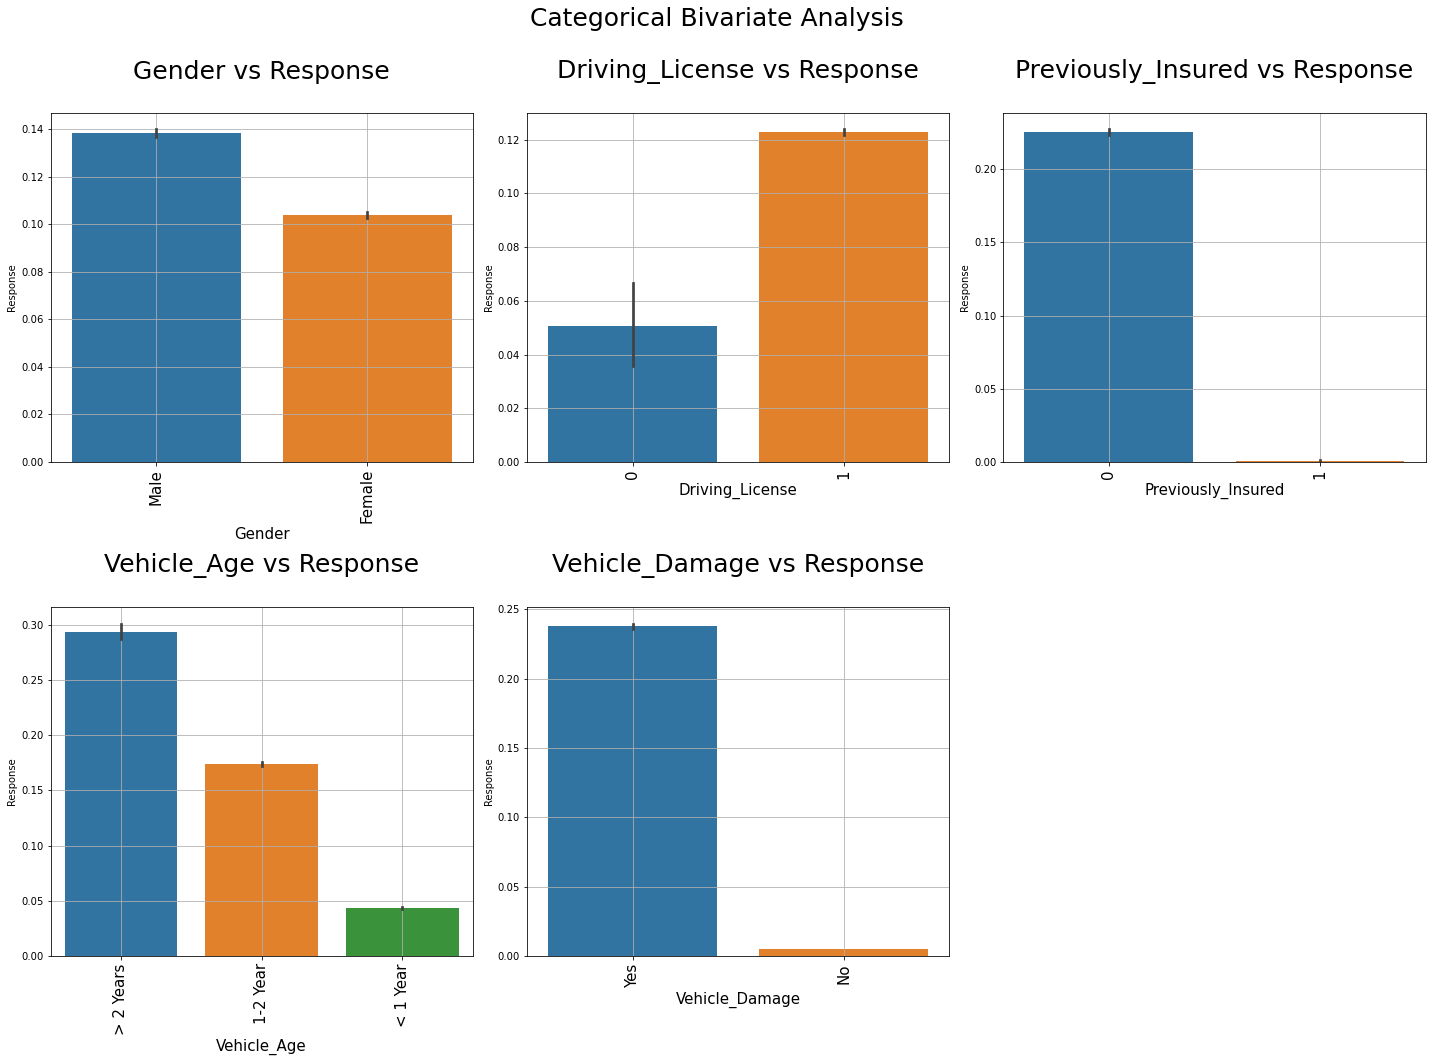

In [16]:
plt.figure(figsize = [20,15])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=25)
i=1
for col in categorical_columns:
        plt.subplot(2,3,i)
        sns.barplot(x=train[col],y=train['Response'])
        plt.title(f'{col} vs Response\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        plt.grid()
        
        
plt.tight_layout()
plt.show()

In [17]:
# train.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

train['Gender'] = train['Gender'].map({'Female':1, 'Male':0})

In [18]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1, 'No':0})

In [19]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


<AxesSubplot:>

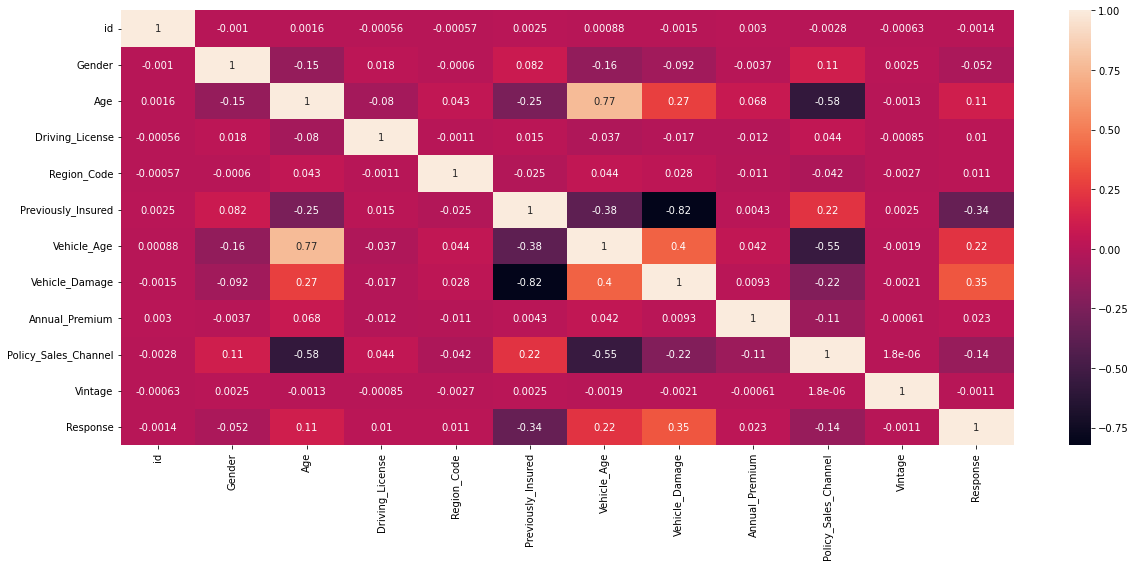

In [20]:
plt.figure(figsize = (20, 8))
sns.heatmap(train.corr(), annot = True)

In [21]:
correlation = train.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

# Preprocessing

In [22]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage','Region_Code','Policy_Sales_Channel']

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])
mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [24]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [25]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,0.333777,1,28.0,0,2,1,0.070366,26.0,0.748795,1
1,2,0,2.396751,1,3.0,0,1,0,0.057496,26.0,0.342443,0
2,3,0,0.527181,1,28.0,0,2,1,0.066347,26.0,-1.521998,1
3,4,0,-1.148985,1,11.0,1,0,0,0.048348,152.0,0.581474,0
4,5,1,-0.633242,1,41.0,1,0,0,0.046259,152.0,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,2.267815,1,26.0,1,1,0,0.051234,26.0,-0.792954,0
381105,381106,0,-0.568774,1,37.0,1,0,0,0.069551,152.0,-0.279037,0
381106,381107,0,-1.148985,1,30.0,1,0,0,0.060439,160.0,0.079509,0
381107,381108,1,1.881007,1,14.0,0,2,1,0.078110,124.0,-0.960275,0


# Classification Model

In [26]:
x = train.drop(columns = [ 'id', 'Response'])
y = train['Response']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
# Predicting the outputs
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66382
           1       0.31      0.30      0.30      9840

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



# Evaluating on Test data

In [33]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [34]:
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes':1, 'No':0})
test['Vehicle_Age'] = test['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,0,27,1,28.0,1,0,0,59097.0,152.0,297


In [35]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [36]:
test.drop(columns = ['id'])

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,0,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,1,26,1,37.0,1,0,0,30867.0,152.0,56
127033,1,38,1,28.0,0,1,1,28700.0,122.0,165
127034,0,21,1,46.0,1,0,0,29802.0,152.0,74
127035,0,71,1,28.0,1,1,0,62875.0,26.0,265
